In [23]:
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import numpy as np
from matplotlib import pyplot as plt

In [24]:
#Cargandoel dataset
dataset = pd.read_csv('..\\Datasets\\felicidad.csv')
dataset.head()

,country,rank,score,high,low,gdp,family,lifexp,freedom,generosity,corruption,dystopia
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [25]:
#Seleccionando los features y el target
X = dataset[['gdp','family','lifexp','freedom','corruption','generosity','dystopia']]
y = dataset[['score']]

print(X.shape)
print(y.shape)

(155, 7)
(155, 1)


In [26]:
#Diviendo los datos para entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

In [48]:
#Definiendo el modelo ElasticNet
modelo_elasticnet = ElasticNet(alpha=0.0125).fit(X_train, y_train)
y_predict = modelo_elasticnet.predict(X_test)

In [49]:
#Verificando la perdida del modelo
elasticnet_loss = mean_squared_error(y_test, y_predict)

print('ElasticNet loss: ', elasticnet_loss)

ElasticNet loss:  0.01680421010656884


In [50]:
#Verificando como los coeficientes del modelo afectan los features
print('Coef ElasticNet')
print(modelo_elasticnet.coef_)

Coef ElasticNet
[1.11490077 0.93430335 0.79862413 0.81179808 0.37742033 0.62128355
 0.95134214]


Verificando como varía el error, al variar alpha

In [36]:
alpha = np.linspace(0,1,100)
error = []

for m in alpha:
    modelo_elasticnet = ElasticNet(alpha=m).fit(X_train, y_train)
    y_predict = modelo_elasticnet.predict(X_test)
    error.append(mean_squared_error(y_test, y_predict))

C:\Users\diego\AppData\Local\Temp\ipykernel_3360\3469094535.py:5: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  modelo_elasticnet = ElasticNet(alpha=m).fit(X_train, y_train)
C:\Users\diego\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


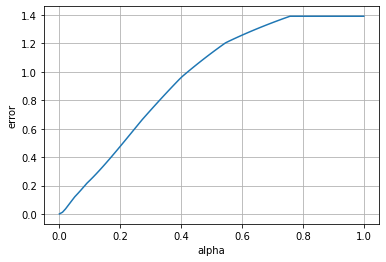

In [41]:
plt.plot(i,error)
plt.grid()
plt.xlabel('alpha')
plt.ylabel('error')
plt.show()